In [1]:
import pandas as pd
import matplotlib.pylab as plt
import urllib.request
from urllib.request import urlretrieve
import zipfile
import geopandas as gp

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/nfshome/sn2495/.conda/envs/party/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
df_2010 = pd.read_csv('2010_ny.csv')
df_2010.head()

,ZIP code [1],Size of adjusted gross income,Number of returns,Number of joint returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Adjusted gross income (AGI)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000,Total,"9,029,034","2,887,431","5,917,373","17,046,994","5,305,074","630,212,010"
3,00000,"$1 under $25,000",3601291,484563,2269282,5354338,1583251,43490121
4,00000,"$25,000 under $50,000",2154337,491065,1352282,3924448,1188354,78244442


In [4]:
df_2015 = pd.read_csv('2015_ny.csv')
df_2015.head()

/nfshome/sn2495/.conda/envs/party/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ZIP code [1],Size of adjusted gross income,Number of returns,Total income,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Total,"9,491,740","808,666,360",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,"$1 under $25,000",3553130,43828577,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,"$25,000 under $50,000",2091460,77103030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_2010.columns

Index(['ZIP\ncode [1]', 'Size of adjusted gross income', 'Number of returns',
       'Number of joint returns', 'Number with paid preparer's signature',
       'Number of exemptions', 'Number of dependents',
       'Adjusted gross income (AGI)'],
      dtype='object')

In [8]:
df_2010 = df_2010[["ZIP\ncode [1]", "Size of adjusted gross income", "Number of returns", "Adjusted gross income (AGI)"]]
df_2010.head()

,ZIP code [1],Size of adjusted gross income,Number of returns,Adjusted gross income (AGI)
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,00000,Total,"9,029,034","630,212,010"
3,00000,"$1 under $25,000",3601291,43490121
4,00000,"$25,000 under $50,000",2154337,78244442


In [9]:
df_2010.columns = ['zip', 'category', 'num_returns', 'total_income']
df_2010.head()

,zip,category,num_returns,total_income
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,00000,Total,"9,029,034","630,212,010"
3,00000,"$1 under $25,000",3601291,43490121
4,00000,"$25,000 under $50,000",2154337,78244442


In [12]:
df_2010 = df_2010.dropna(how='all')

In [13]:
df_2010.head()

,zip,category,num_returns,total_income
2,00000,Total,"9,029,034","630,212,010"
3,00000,"$1 under $25,000",3601291,43490121
4,00000,"$25,000 under $50,000",2154337,78244442
5,00000,"$50,000 under $75,000",1198049,73709667
6,00000,"$75,000 under $100,000",746332,64653285


In [14]:
df_2015.columns

Index(['ZIP\ncode [1]', 'Size of adjusted gross income', 'Number of returns',
       'Total income', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 121', 'Unnamed: 122', 'Unnamed: 123', 'Unnamed: 124',
       'Unnamed: 125', 'Unnamed: 126', 'Unnamed: 127', 'Unnamed: 128',
       'Unnamed: 129', 'Unnamed: 130'],
      dtype='object', length=131)

In [15]:
df_2015 = df_2015[['ZIP\ncode [1]', 'Size of adjusted gross income', 'Number of returns',
       'Total income']]
df_2015.head()

,ZIP code [1],Size of adjusted gross income,Number of returns,Total income
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,0,Total,"9,491,740","808,666,360"
3,0,"$1 under $25,000",3553130,43828577
4,0,"$25,000 under $50,000",2091460,77103030


In [16]:
df_2015.columns = ['zip', 'category', 'num_returns', 'total_income']
df_2015.head()

,zip,category,num_returns,total_income
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,0,Total,"9,491,740","808,666,360"
3,0,"$1 under $25,000",3553130,43828577
4,0,"$25,000 under $50,000",2091460,77103030


In [17]:
df_2015 = df_2015.dropna(how='all')
df_2015.head(20)

,zip,category,num_returns,total_income
2,0,Total,"9,491,740","808,666,360"
3,0,"$1 under $25,000",3553130,43828577
4,0,"$25,000 under $50,000",2091460,77103030
5,0,"$50,000 under $75,000",1274200,79310666
6,0,"$75,000 under $100,000",817760,71585851
7,0,"$100,000 under $200,000",1233950,170870661
8,0,"$200,000 or more",521240,365967575
10,10001,NaN,"14,310","2,402,685"
11,10001,"$1 under $25,000",3760,44588
12,10001,"$25,000 under $50,000",2430,92506


In [18]:
zipcodes = gp.GeoDataFrame.from_file("ZIP_CODE_040114.shp")

In [19]:
zipcodes.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [23]:
nyc_zip = set(zipcodes.ZIPCODE)

In [27]:
nyc_2010 = df_2010[df_2010['zip'].isin(nyc_zip)]

In [46]:
sum(df_2015['zip'].isin(nyc_zip))

0

In [51]:
df_2015 = df_2015[:-17]

In [53]:
nyc_2015 = df_2015[df_2015['zip'].isin(nyc_zip)]

In [55]:
nyc_2015['zip'] = nyc_2015['zip'].astype(int)

/nfshome/sn2495/.conda/envs/party/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
nyc_2015 = nyc_2015[nyc_2015.isnull().any(axis=1)].drop(['category'], axis=1)

In [61]:
nyc_2010 = nyc_2010[nyc_2010.isnull().any(axis=1)].drop(['category'], axis=1)

In [71]:
nyc_2010['zip'] = pd.to_numeric(nyc_2010['zip'])

In [72]:
nyc_2015['zip'] = pd.to_numeric(nyc_2015['zip'])

In [73]:
nyc = pd.merge(nyc_2010, nyc_2015, left_on = 'zip', right_on='zip', how='inner')

In [76]:
nyc.columns = ['zip', 'num_returns_2010', 'total_income_2010', 'num_returns_2015',
       'total_income_2015']

In [84]:
nyc = nyc.apply(lambda x: x.astype(str).str.replace(',', '').astype(int))

In [85]:
nyc['change_returns'] = nyc['num_returns_2015'] - nyc['num_returns_2010']

In [87]:
nyc['change_tot_income'] = nyc['total_income_2015'] - nyc['total_income_2010']

In [89]:
nyc.head()

,zip,num_returns_2010,total_income_2010,num_returns_2015,total_income_2015,change_returns,change_tot_income
0,10001,13202,1699184,14310,2402685,1108,703501
1,10002,44718,1791614,43190,2334694,-1528,543080
2,10003,29535,5385068,30050,7562151,515,2177083
3,10004,2102,615469,2490,1018420,388,402951
4,10005,5281,3889908,6160,3812495,879,-77413


In [94]:
ct = gp.GeoDataFrame.from_file("ZIP_CODE_040114.shp")

In [95]:
ct.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [101]:
type(ct['ZIPCODE'][0])

str

In [102]:
ct['ZIPCODE'] = ct['ZIPCODE'].astype(int)

In [103]:
nyc_geo = pd.merge(nyc, ct,how='inner', left_on = "zip", right_on = "ZIPCODE")

In [104]:
nyc_geo = gp.GeoDataFrame(nyc_geo)

In [105]:
nyc_geo.head()

,zip,num_returns_2010,total_income_2010,num_returns_2015,total_income_2015,change_returns,change_tot_income,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,10001,13202,1699184,14310,2402685,1108,703501,10001,0,New York,22413.0,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((981958.6472873986 213464.4530421346,..."
1,10002,44718,1791614,43190,2334694,-1528,543080,10002,0,New York,81305.0,2.628013e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((991339.8703228086 207576.7837151289,..."
2,10003,29535,5385068,30050,7562151,515,2177083,10003,0,New York,55878.0,1.553838e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((989830.469142139 207048.1263078749, ..."
3,10004,2102,615469,2490,1018420,388,402951,10004,0,New York,2187.0,4.002521e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((981197.408652395 196571.0816452205, ..."
4,10004,2102,615469,2490,1018420,388,402951,10004,0,New York,2187.0,1.202708e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((972696.8446168154 193014.5477478057,..."


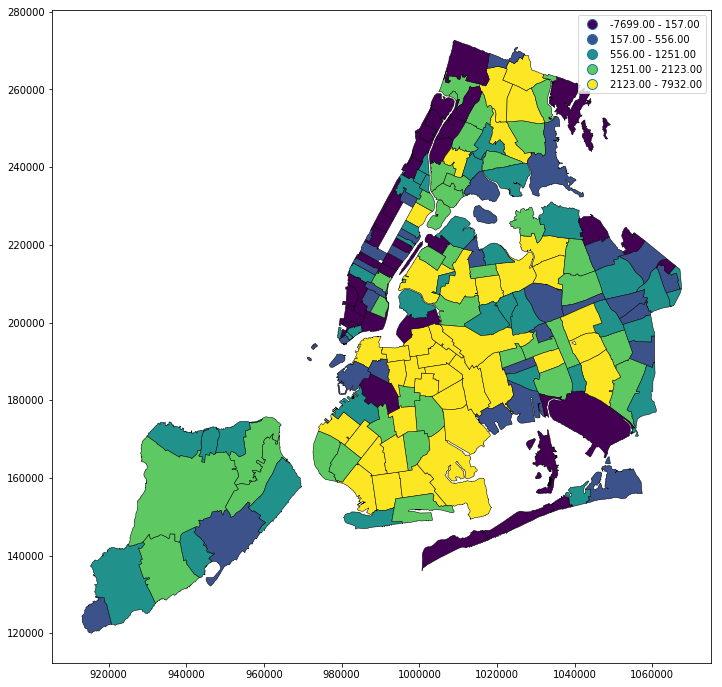

In [114]:
nyc_geo.plot(column = 'change_returns', figsize=(20,12), 
                 cmap='viridis',edgecolor = 'k', lw = 0.5,scheme='quantiles' ,legend=True)

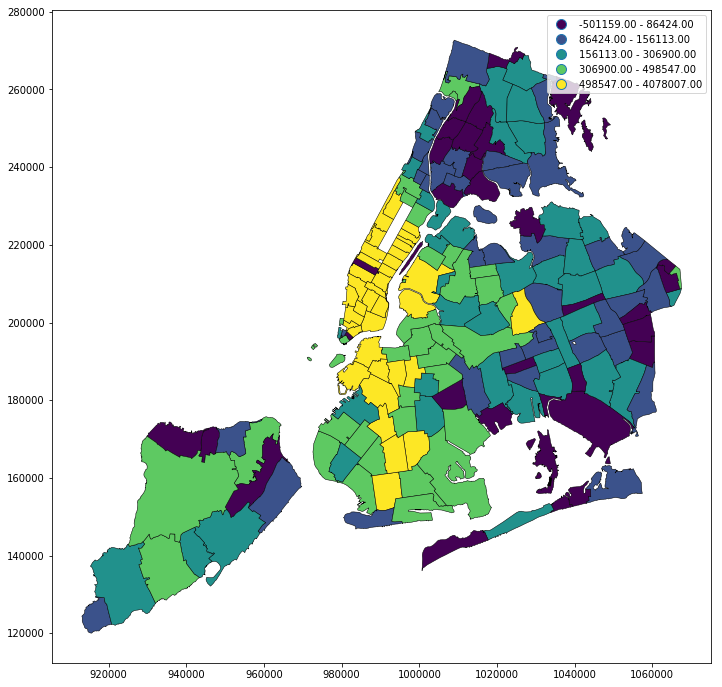

In [116]:
nyc_geo.plot(column = 'change_tot_income', figsize=(20,12), 
                 cmap='viridis',edgecolor = 'k', lw = 0.5,scheme='quantiles' ,legend=True)